<a href="https://colab.research.google.com/github/robertopsouto/invmultifis_notebooks/blob/main/english/INVMULTIFIS_CSEM3D_gperftools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INVMULTIFIS Project: Development of multi-physics data inversion software with optimization via artificial intelligence**

The project proposes the development of an innovative inversion technology for the characterization and monitoring of deep water reservoirs for Petrobras (the Brazilian Oil Company) using CSEM (Controlled-Source Electromagnetic Methods), a robust risk reduction tool in the drilling of oil basins, using multiphysics data in the 3D domain. One of the main objectives of this project is to develop, optimize and parallelize CSEM codes, aiming at improving their performance.

# Steps to install CSEM3D program

### Installing GNU Make v4.3 to correct deal with CSEM3D `makefile`

In [ ]:
%%bash
wget https://ftp.gnu.org/gnu/make/make-4.3.tar.gz
tar xfz make-4.3.tar.gz

In [ ]:
%%bash
cd make-4.3
./configure
make
make install

In [ ]:
%%bash
make -v

## Install and configure dependencies/libraries

In [57]:
%%bash
apt install gv
apt install ghostscript
apt install graphviz

Reading package lists...
Building dependency tree...
Reading state information...
gv is already the newest version (1:3.7.4-2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
Reading package lists...
Building dependency tree...
Reading state information...
ghostscript is already the newest version (9.55.0~dfsg1-0ubuntu5.3).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
Reading package lists...
Building dependency tree...
Reading state information...
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [ ]:
%%bash
cd /usr/lib/x86_64-linux-gnu
#ln -s libtcmalloc.so.4 libtcmalloc.so
#ln -s libprofiler.so.0 libprofiler.so
ln -s libtcmalloc_and_profiler.so.4 libtcmalloc_and_profiler.so

##   Creating user, once OpenMPI does not recommend run MPI with `root` user



In [ ]:
%%bash
adduser csem

## PETSC v3.18.4

### Download, extract the source code file and run `configure` file

In [ ]:
%%bash
su csem
mkdir -p ${HOME}/petsc/gnu
cd ${HOME}/petsc/gnu
wget https://gitlab.com/petsc/petsc/-/archive/v3.18.4/petsc-v3.18.4.tar.gz
tar zxvf petsc-v3.18.4.tar.gz
cd petsc-v3.18.4
./configure \
 --prefix=${PWD}/installdir \
 --with-fortran \
 --with-fortran-kernels=true \
 --with-cuda \
 --download-fblaslapack \
 --with-scalar-type=complex \
 --with-precision=double \
 --with-debugging=0 \
 --with-x=0 \
 --with-gnu-compilers=1 \
 --with-cc=mpicc \
 --with-cxx=mpicxx \
 --with-fc=mpif90 \
 --with-make-exec=make \
 2>&1 | tee ../configure.out

### Run `make all` phase.
```bash
If it is successfully finished, this message must appear:

=========================================
Now to install the libraries do:
make PETSC_DIR=/home/csem/petsc/gnu/petsc-v3.18.4 PETSC_ARCH=arch-linux-c-opt install
=========================================
```

In [ ]:
%%bash
su csem
cd /home/csem/petsc/gnu/petsc-v3.18.4
make PETSC_DIR=/home/csem/petsc/gnu/petsc-v3.18.4 PETSC_ARCH=arch-linux-c-opt all

### Run `make install` phase
```bash
If it is successfully finished, this message must appear:

====================================
Install complete.
Now to check if the libraries are working do (in current directory):
make PETSC_DIR=/home/csem/petsc/gnu/petsc-v3.18.4/installdir PETSC_ARCH="" check
====================================
```

In [ ]:
%%bash
su csem
cd /home/csem/petsc/gnu/petsc-v3.18.4
make PETSC_DIR=/home/csem/petsc/gnu/petsc-v3.18.4 PETSC_ARCH=arch-linux-c-opt install

### Run `make check` phase
```bash
If it is successfully finished, this message must appear:

Running check examples to verify correct installation
Using PETSC_DIR=/home/csem/petsc/gnu/petsc-v3.18.4/installdir and PETSC_ARCH=
C/C++ example src/snes/tutorials/ex19 run successfully with 1 MPI process
C/C++ example src/snes/tutorials/ex19 run successfully with 2 MPI processes
C/C++ example src/snes/tutorials/ex19 run successfully with cuda
Fortran example src/snes/tutorials/ex5f run successfully with 1 MPI process
Completed test examples
```

In [ ]:
%%bash
su csem
cd /home/csem/petsc/gnu/petsc-v3.18.4
make PETSC_DIR=/home/csem/petsc/gnu/petsc-v3.18.4/installdir PETSC_ARCH="" check

### Test an example performing complex numbers (`ex11f.F90`)

In [ ]:
%%bash
su csem
cd /home/csem/petsc/gnu/petsc-v3.18.4/src/ksp/ksp/tutorials
make ex11f
mpirun -n 1 ./ex11f -norandom -pc_type none -ksp_monitor_short -ksp_gmres_cgs_refinement_type refine_always

### Check with reference output (`output/ex11f_1.out`)

In [ ]:
%%bash
su csem
cd /home/csem/petsc/gnu/petsc-v3.18.4/src/ksp/ksp/tutorials
cat output/ex11f_1.out

### Following instructions in https://petsc.org/release/developers/testing/ to run an example that requires CUDA.

In [ ]:
%%bash
su csem
cd /home/csem/petsc/gnu/petsc-v3.18.4/
make print-test query='suffix' queryval='2_aijcusparse'

In [ ]:
%%bash
su csem
cd /home/csem/petsc/gnu/petsc-v3.18.4/
make test search=ksp_ksp_tutorials-ex1_2_aijcusparse

In [ ]:
%%bash
su csem
cd /home/csem/petsc/gnu/petsc-v3.18.4/
cat arch-linux-c-opt/tests/ksp/ksp/tutorials/runex1_2_aijcusparse/ksp_ksp_tutorials-ex1_2_aijcusparse.sh

In [ ]:
%%bash
su csem
cd /home/csem/petsc/gnu/petsc-v3.18.4/
cd src/ksp/ksp/tutorials/
make ex1
/usr/bin/mpiexec --oversubscribe  -n 1  ./ex1 \
-petsc_ci \
-pc_type sor \
-pc_sor_symmetric \
-ksp_monitor_short \
-ksp_gmres_cgs_refinement_type refine_always \
-mat_type aijcusparse \
-vec_type cuda \
-use_gpu_aware_mpi 0


If it is successfully finished, this output must appear:
```bash
  0 KSP Residual norm 0.968764
  1 KSP Residual norm 0.361001
  2 KSP Residual norm 0.247329
  3 KSP Residual norm 0.0808915
  4 KSP Residual norm 0.01289
  5 KSP Residual norm 0.00375064
  6 KSP Residual norm 0.000294092
  7 KSP Residual norm 1.40861e-05
  8 KSP Residual norm 3.48863e-07
KSP Object: 1 MPI process
  type: gmres
    restart=30, using Classical (unmodified) Gram-Schmidt Orthogonalization with one step of iterative refinement
    happy breakdown tolerance 1e-30
  maximum iterations=10000, initial guess is zero
  tolerances:  relative=1e-05, absolute=1e-50, divergence=10000.
  left preconditioning
  using PRECONDITIONED norm type for convergence test
PC Object: 1 MPI process
  type: sor
    type = symmetric, iterations = 1, local iterations = 1, omega = 1.
  linear system matrix = precond matrix:
  Mat Object: 1 MPI process
    type: seqaijcusparse
    rows=10, cols=10
    total: nonzeros=28, allocated nonzeros=28
    total number of mallocs used during MatSetValues calls=0
      not using I-node routines
Norm of error 4.10316e-07, Iterations 8
  0 KSP Residual norm 0.377523
  1 KSP Residual norm 0.0140399
  2 KSP Residual norm 0.000364106
  3 KSP Residual norm 7.83047e-06
  4 KSP Residual norm 1.33045e-07

  ```

In [ ]:
%%bash
su csem
cd /home/csem/petsc/gnu/petsc-v3.18.4/
cd src/ksp/ksp/tutorials/
cat output/ex1_2_aijcusparse.out

### Profiling with `nvprof`

In [ ]:
%%bash
su csem
cd /home/csem/petsc/gnu/petsc-v3.18.4/
cd src/ksp/ksp/tutorials/
make ex1
export PATH=/usr/local/cuda/bin:$PATH
/usr/bin/mpiexec --oversubscribe  -n 1 nvprof -f -o ex1.%q{OMPI_COMM_WORLD_RANK}.nvprof ./ex1 \
-petsc_ci \
-pc_type sor \
-pc_sor_symmetric \
-ksp_monitor_short \
-ksp_gmres_cgs_refinement_type refine_always \
-mat_type aijcusparse \
-vec_type cuda \
-use_gpu_aware_mpi 0

### Show profiling obtained with `nvprof`

In [ ]:
%%bash
su csem
cd /home/csem/petsc/gnu/petsc-v3.18.4/
cd src/ksp/ksp/tutorials/
export PATH=/usr/local/cuda/bin:$PATH
nvprof -i ex1.0.nvprof

## `CSEM3D` program

### Download the source code files of `CSEM3D` program in the `root` area.

In [ ]:
%%bash
wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=10WfuzFuv9bfr9MTeyphTyRM7i9rjGlxf' -O csem3d_w-v1.0.2.tar.gz

### Copy the tarball file to `csem` user account area, and change the onwer of this file to `csem` user.

In [ ]:
%%bash
cp csem3d_w-v1.0.2.tar.gz /home/csem/
chown csem:csem /home/csem/csem3d_w-v1.0.2.tar.gz

### Unpacking the tarball file

In [ ]:
%%bash
su csem
cd /home/csem
tar zxvf csem3d_w-v1.0.2.tar.gz

### Run `make all` to install the `CSEM3D` program
```bash
If it is successfully finished, this message must appear:

mpif90 -o CSEM3D_W outfields_E_Tx.o spline.o bottom.o allvars.o intpol1.o biprho.o dimped.o in3dmod.o compute_src_wts.o set_resist_vector.o locals.o kinds.o outfields_B_Tx.o B_Tx_B_Rx.o dimens.o set_P.o set_bv_e.o d1imped.o set_src.o grid.o in3drho.o CSEM3D_mod.o CSEM3D_W.o set_bv_h.o bipole2.o set_A.o chk_rx_tx.o set_1d_resist.o txrx.o splint.o set_rhs.o blocks.o E_Tx_E_Rx.o convres.o abs_to_rel.o B_Tx_E_Rx.o E_Tx_B_Rx.o addair.o -L/home/csem/petsc/gnu/petsc-v3.18.4/installdir/lib -lpetsc  
```

In [ ]:
%%bash
su csem
cd /home/csem/csem3d_w-v1.0.2/CSEM3D_W/CSEM3D_W
sed 's/FLFLAGS=-L${PETSC_DIR}\/lib -lpetsc/FLFLAGS=-L${PETSC_DIR}\/lib -lpetsc -L\/usr\/lib\/x86_64-linux-gnu -ltcmalloc_and_profiler/' scripts/makefile_gnu > scripts/makefile_gnu_gperftools
cat scripts/makefile_gnu_gperftools
make PETSC_DIR=${HOME}/petsc/gnu/petsc-v3.18.4/installdir -f scripts/makefile_gnu_gperftools clean

In [ ]:
%%bash
su csem
cd /home/csem/csem3d_w-v1.0.2/CSEM3D_W/CSEM3D_W
make PETSC_DIR=${HOME}/petsc/gnu/petsc-v3.18.4/installdir -f scripts/makefile_gnu_gperftools all

In [ ]:
%%bash
su csem
cd /home/csem/csem3d_w-v1.0.2/CSEM3D_W/CSEM3D_W
ldd CSEM3D_W

### Run this bash `script` to execute the generated `CSEM3D_W` binary file.

```bash
If it is successfully finished, a similar message like below must appear:

 16 KSP preconditioned resid norm 3.863008301354e-18 true resid norm 1.284864871592e-05 ||r(i)||/||b|| 3.405644702963e-01
 17 KSP preconditioned resid norm 2.061402843466e-18 true resid norm 1.054741071689e-05 ||r(i)||/||b|| 2.795681805313e-01
 18 KSP preconditioned resid norm 1.062033155132e-18 true resid norm 3.992776343547e-06 ||r(i)||/||b|| 1.058319664983e-01
 converged reason            2
 total number of relaxations           18
 ========================================


 ************************************************
  3D finished
  Total CPU time:    18.7500000      seconds
 ************************************************

 total cpu time:    18.7500000      seconds
 CSEM3D_W finished
```



In [59]:
%%bash
su csem
cd /home/csem/csem3d_w-v1.0.2/CSEM3D_W/CSEM3D_W

PETSC_DIR=${HOME}/petsc/gnu/petsc-v3.18.4/installdir

dataset=Sintetico
ntasks=1
nnodes=1

TIMESTART=$(date +%Y%m%d%H%M%S)

if [[ -L ${dataset} ]]
then
    echo "Link já existe para o dataset ${dataset}"
else
    ln -s dataset/${dataset}
fi
sed 's/\.\//'${dataset}'\//g' ${dataset}/Parameters.inp | \
sed 's/'${dataset}'\/OutData/OutData/g' > Parameters.inp

outputdir="OutData"
if [[ -d ${outputdir} ]]
then
    echo "OutData já existe."
    rm -fr ${outputdir}
fi
mkdir ${outputdir}


resultsdir=results/${dataset}/NUMNODES-${nnodes}/MPI-${ntasks}/EXECSTART-${TIMESTART}
mkdir -p ${resultsdir}

export LD_LIBRARY_PATH=${LD_LIBRARY_PATH}:${PETSC_DIR}/lib

executable=CSEM3D_W

export MALLOCSTATS=1
export CPUPROFILE=${executable}.prof

echo "mpirun -np $ntasks ./${executable}"
mpirun --use-hwthread-cpus -np $ntasks ./${executable} \
 -A_mat_type mpiaij \
 -P_mat_type mpiaij \
 -em_ksp_monitor_true_residual \
 -em_ksp_type bcgs \
 -em_pc_type bjacobi \
 -em_sub_pc_type ilu \
 -em_sub_pc_factor_levels 3 \
 -em_sub_pc_factor_fill 6 \
 < ./Parameters.inp \
 2>&1 | tee csem3d_w-${TIMESTART}.out

mv $outputdir/ ${resultsdir}/
cp csem3d_w-${TIMESTART}.out ${resultsdir}/

google-pprof --gv ./${executable} ./${executable}.prof
google-pprof --pdf ./${executable} ./${executable}.prof > ./${executable}.pdf
google-pprof --dot ./${executable} ./${executable}.prof > ./${executable}.dot


Link já existe para o dataset Sintetico
mpirun -np 1 ./CSEM3D_W



 enter 3D model rhoxx file name

 enter 3D model rhoyy file name

 enter 3D model rhozz file name
 enter error level for stopping? (>= 1e-6 suggested)
   (this is the value rnorm/bnorm where rnorm is the
    L2 norm of the residual and bnorm is the L2 norm
    of the right-hand side. Smaller values result in
    more accurate solutions, but at the
    expense of more relaxation iterations.
 enter max number of relaxations (50-100 suggested)
 use 1D boundary values (y/n)
 [IF YOU TYPE N, THEN ZERO BOUNDARY VALUES WILL BE USED]
 do a deep water caclulation? (y/n)
 [THIS WILL REPLACE AIR LAYERS WITH SEA LAYERS]
 enter directory name for input Tx files
 enter directory name for output 3D files
 force receivers to seafloor (y/n)?
 Compute results for electric or magnetic dipole sources (e/m)?
 how many Tx files to compute?
 enter name for Tx data file           1

 Reading model dimensions from file Sintetico/Model/ResUni1D_

Using local file ./CSEM3D_W.
Using local file ./CSEM3D_W.prof.
Dropping nodes with <= 9 samples; edges with <= 1 abs(samples)
gv: Unable to open the display.
Using local file ./CSEM3D_W.
Using local file ./CSEM3D_W.prof.
Dropping nodes with <= 9 samples; edges with <= 1 abs(samples)
Using local file ./CSEM3D_W.
Using local file ./CSEM3D_W.prof.
Dropping nodes with <= 9 samples; edges with <= 1 abs(samples)


In [60]:
%%bash
su csem
cd /home/csem/csem3d_w-v1.0.2/CSEM3D_W/CSEM3D_W
ls -l *.prof
ls -l *.pdf
ls -l *.dot

-rw-rw-r-- 1 csem csem 231205 Aug 10 20:26 CSEM3D_W.prof
-rw-rw-r-- 1 csem csem 22444 Aug 10 20:26 CSEM3D_W.pdf
-rw-rw-r-- 1 csem csem 12862 Aug 10 20:26 CSEM3D_W.dot


/home/csem/csem3d_w-v1.0.2/CSEM3D_W/CSEM3D_W


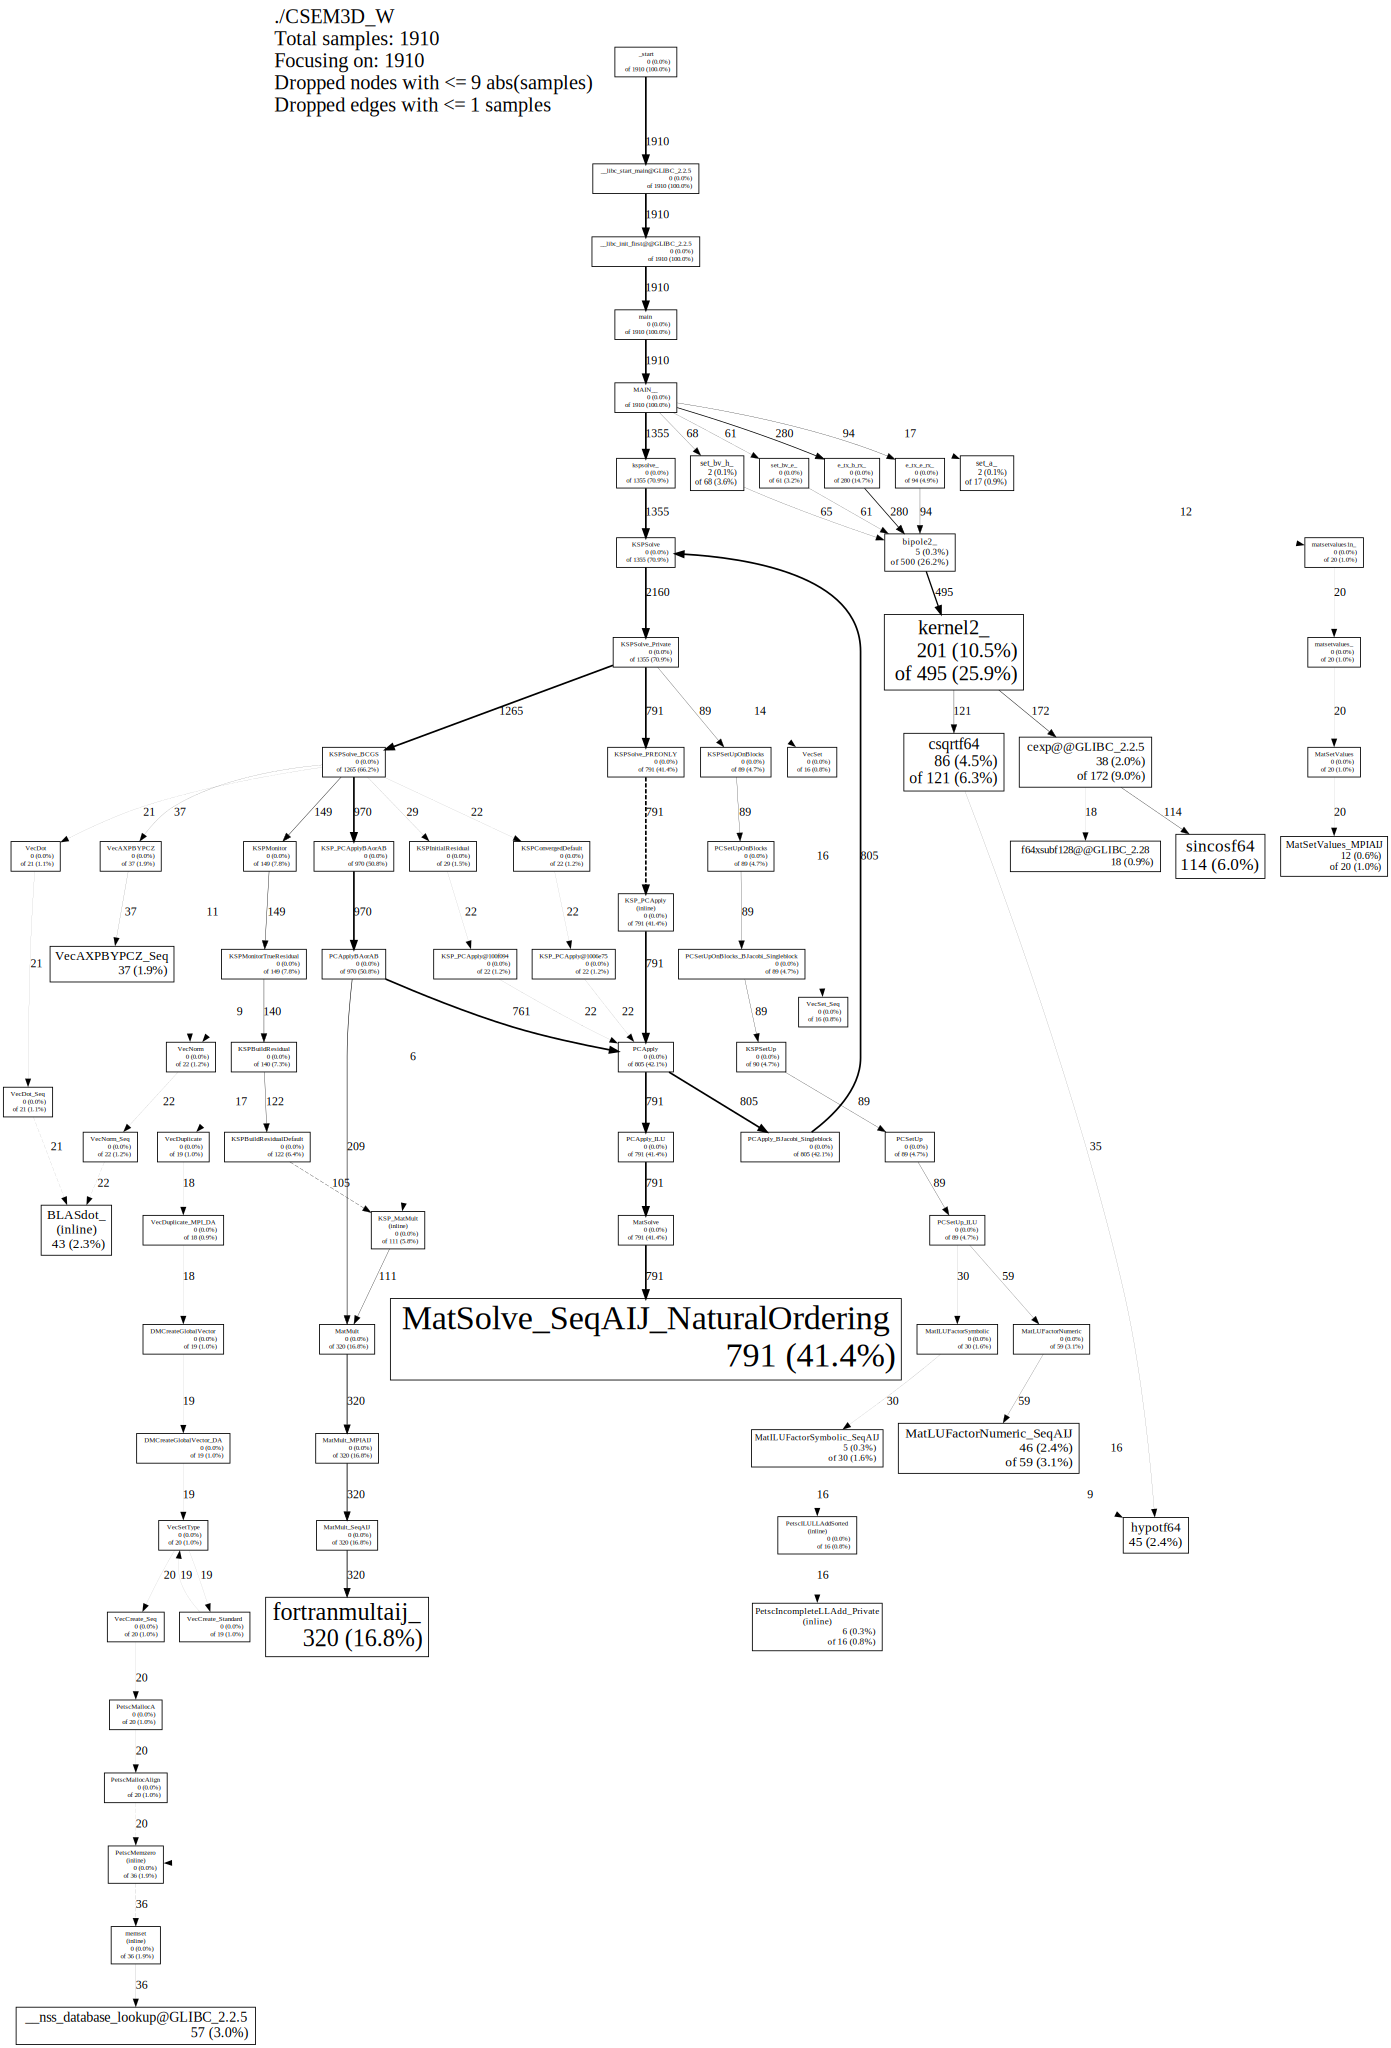

In [65]:
import graphviz
%cd /home/csem/csem3d_w-v1.0.2/CSEM3D_W/CSEM3D_W
graphviz.Source.from_file('CSEM3D_W.dot')